In [1]:
import sys
sys.path.append('../scripts/')
from dp_policy_agent import *

In [168]:
class DpPolicyAgent2(DpPolicyAgent): 
    def __init__(self, *args, **kwargs): 
        super().__init__(*args, **kwargs)
        
        self.history = []
        
    def init_policy(self, index_nums):
        tmp = np.zeros(np.r_[index_nums,2])
        for line in open("/Users/ueda/tmp/sarsa_lambda1_policy200000.txt", "r"):
            d = line.split()
            tmp[int(d[0]), int(d[1]), int(d[2])] = [float(d[3]), float(d[4])]
            
        return tmp
    
    def policy(self, pose, goal=None): 
        a = self.policy_data[self.to_index(pose, self.pose_min, self.index_nums, self.widths)]
        self.history.append(a)
        
        ##左右に回転が続いたら前進というヒューリスティックを加える##
        if len(self.history) < 2: return a
        if self.history[-1][0] + self.history[-2][0] == 0.0 and self.history[-1][1] + self.history[-2][1] == 0.0: #過去二回の速度、角速度の和がゼロ
            return (1.0, 0.0)
        
        return a
    
    def draw(self, ax, elems):
        pass

<IPython.core.display.Javascript object>


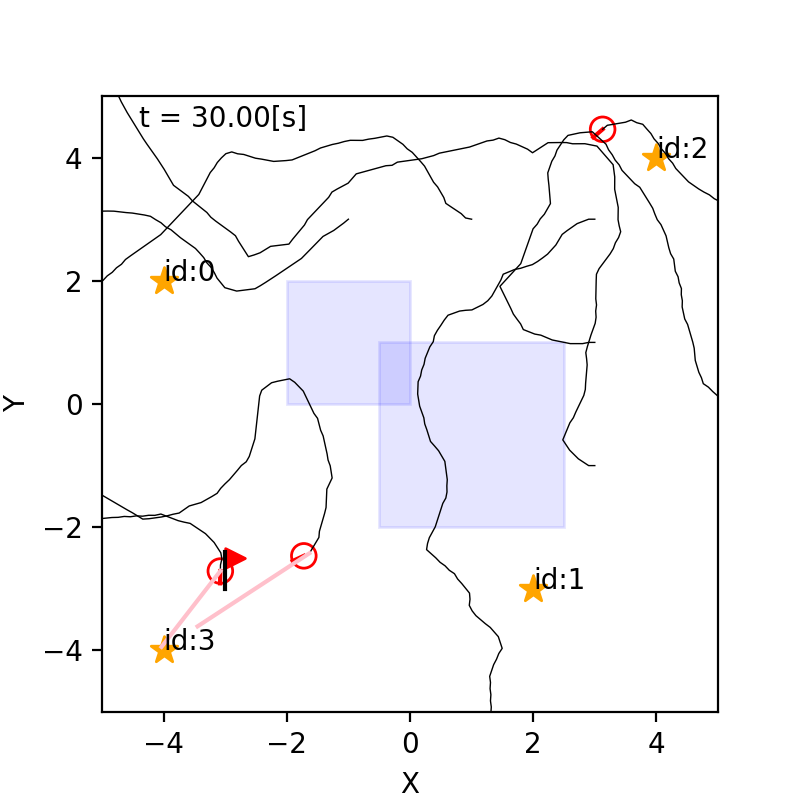

In [169]:
def trial():  ###dppolicyagentrun
    time_interval = 0.1
    world = PuddleWorld(30, time_interval, debug=False) 

    ## 地図を生成して3つランドマークを追加 ##
    m = Map()
    for ln in [(-4,2), (2,-3), (4,4), (-4,-4)]: m.append_landmark(Landmark(*ln))
    world.append(m)   

    ##ゴールの追加##
    goal = Goal(-3,-3)  #goalを変数に
    world.append(goal)
    
    ##水たまりの追加##
    world.append(Puddle((-2, 0), (0, 2), 0.1)) 
    world.append(Puddle((-0.5, -2), (2.5, 1), 0.1)) 

    ##4台のロボットを動かしてみる##   ##dppolicyagentrun
    init_poses = []
    for p in [[-1,3,np.pi], [1, 3, np.pi], [3, 3, np.pi], [3, 1, np.pi], [3, -1, np.pi]]:
        init_pose = np.array(p).T
    
        kf = KalmanFilter(m, init_pose)
        a = DpPolicyAgent2(time_interval, kf, goal)
        r = Robot(init_pose, sensor=Camera(m, distance_bias_rate_stddev=0, direction_bias_stddev=0), 
              agent=a, color="red", bias_rate_stds=(0,0))

        world.append(r)
        
    world.draw()
    
trial()